# Deep Learning for Computer Vision with Python
# 12. Training Your First CNN

In [1]:
from keras.preprocessing.image import img_to_array
import cv2,os
import numpy as np

Using TensorFlow backend.


In [2]:
class ImageToArrayPreprocessor:
    def __init__(self, dataFormat=None):
        self.dataFormat = dataFormat

    def preprocess(self, image):
        return img_to_array(image, data_format=self.dataFormat)

In [3]:
class SimplePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        self.width = width
        self.height = height
        self.inter = inter
    def preprocess(self, image):
        return cv2.resize(image, (self.width, self.height),interpolation=self.inter) 

In [4]:
class SimpleDatasetLoader:
    def __init__(self, preprocessors=None):
        self.preprocessors = preprocessors
        if self.preprocessors is None:
            self.preprocessors = []

    def load(self, imagePaths, verbose=-1):
        data = []
        labels = []
        count=0
        for (i, imagePath) in enumerate(imagePaths):
            image = cv2.imread(imagePath)
            label = imagePath.split(os.path.sep)[-2]   #/dataset_name/class/image.jpg
            if self.preprocessors is not None:
                for p in self.preprocessors:
                    if image is None:
                        os.remove(imagePath)
                        continue
                    image = p.preprocess(image)
                data.append(image)
                labels.append(label)
            if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
                print("[INFO] processed {}/{}".format(i + 1,
                    len(imagePaths)))
        return (np.array(data), np.array(labels))

In [5]:
sp = SimplePreprocessor(32, 32)

In [6]:
iap = ImageToArrayPreprocessor()

In [7]:
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])

In [8]:
from imutils import paths

In [9]:
data_dir='D:\\mxnet\\datasets\\animals'
imagePaths = list(paths.list_images(data_dir))

In [10]:
(data, labels) = sdl.load(imagePaths, verbose=500)

[INFO] processed 500/3870
[INFO] processed 1000/3870
[INFO] processed 1500/3870
[INFO] processed 2000/3870
[INFO] processed 2500/3870
[INFO] processed 3000/3870
[INFO] processed 3500/3870


In [11]:
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [12]:
class ShallowNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
        model.add(Conv2D(32, (3, 3), padding="same",
        input_shape = inputShape))
        model.add(Activation("relu"))
        model.add(Flatten())
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [13]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt

In [14]:
print("[INFO] loading images...")
data_dir='D:\\mxnet\\datasets\\animals'
imagePaths = list(paths.list_images(data_dir))

[INFO] loading images...


In [15]:
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)

[INFO] processed 500/3870
[INFO] processed 1000/3870
[INFO] processed 1500/3870
[INFO] processed 2000/3870
[INFO] processed 2500/3870
[INFO] processed 3000/3870
[INFO] processed 3500/3870


In [17]:
data = data.astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data, labels,
        test_size = 0.25, random_state = 42)
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [19]:
from keras.models import Sequential

In [20]:
print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics = ["accuracy"])
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
        batch_size = 32, epochs = 100, verbose = 1)

[INFO] compiling model...
[INFO] training network...

Train on 2902 samples, validate on 968 samples
Epoch 1/100
2902/2902 [==============================] - 3s 920us/step - loss: 0.9855 - accuracy: 0.5093 - val_loss: 0.9075 - val_accuracy: 0.5702
Epoch 2/100
2902/2902 [==============================] - 2s 590us/step - loss: 0.8897 - accuracy: 0.5720 - val_loss: 0.8975 - val_accuracy: 0.5403
Epoch 3/100
2902/2902 [==============================] - 2s 590us/step - loss: 0.8518 - accuracy: 0.5975 - val_loss: 0.8969 - val_accuracy: 0.5393
Epoch 4/100
2902/2902 [==============================] - 2s 601us/step - loss: 0.8185 - accuracy: 0.6068 - val_loss: 0.8570 - val_accuracy: 0.5444
Epoch 5/100
2902/2902 [==============================] - 2s 658us/step - loss: 0.7953 - accuracy: 0.6151 - val_loss: 0.8716 - val_accuracy: 0.5486
Epoch 6/100
2902/2902 [==============================] - 2s 639us/step - loss: 0.7887 - accuracy: 0.6227 - val_loss: 0.8127 - val_accuracy: 0.6012
Epoch 7/100
2902/

2902/2902 [==============================] - 2s 607us/step - loss: 0.4689 - accuracy: 0.8136 - val_loss: 0.6965 - val_accuracy: 0.6849
Epoch 55/100
2902/2902 [==============================] - 2s 520us/step - loss: 0.4707 - accuracy: 0.8088 - val_loss: 0.7054 - val_accuracy: 0.6880
Epoch 56/100
2902/2902 [==============================] - 2s 539us/step - loss: 0.4610 - accuracy: 0.8170 - val_loss: 0.6961 - val_accuracy: 0.6932
Epoch 57/100
2902/2902 [==============================] - 2s 625us/step - loss: 0.4561 - accuracy: 0.8215 - val_loss: 0.6974 - val_accuracy: 0.6942
Epoch 58/100
2902/2902 [==============================] - 2s 747us/step - loss: 0.4529 - accuracy: 0.8125 - val_loss: 0.7162 - val_accuracy: 0.6746
Epoch 59/100
2902/2902 [==============================] - 2s 531us/step - loss: 0.4518 - accuracy: 0.8181 - val_loss: 0.6957 - val_accuracy: 0.6880
Epoch 60/100
2902/2902 [==============================] - 2s 576us/step - loss: 0.4489 - accuracy: 0.8187 - val_loss: 0.7335 

In [21]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
        predictions.argmax(axis=1),
        target_names = ["cat", "dog", "panda"]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         cat       0.55      0.57      0.56       268
         dog       0.71      0.50      0.59       381
       panda       0.71      0.92      0.80       319

    accuracy                           0.66       968
   macro avg       0.66      0.67      0.65       968
weighted avg       0.66      0.66      0.65       968



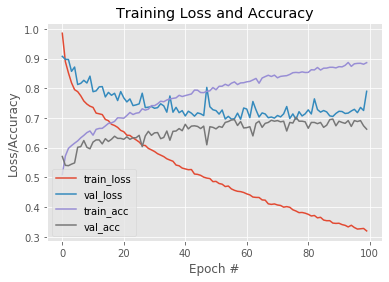

In [22]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
from keras.datasets import cifar10

In [ ]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
                  "dog", "frog", "horse", "ship", "truck"]

In [ ]:
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = ShallowNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
        metrics = ["accuracy"])

In [ ]:
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
        batch_size = 32, epochs = 40, verbose = 1)

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
        predictions.argmax(axis=1), target_names = labelNames))

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")

plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()